# 1. Describe the data
- It has 252 observations
- There are 18 variables:
    - brozek: percent body fat from density estimated by Brozek's equation
    - siri: percent body fat from Siri's equation
    - density: body density (in gm/cm³). Body density is a measure of how much mass is contained in a given volume of the body. Density = Mass / Volume. In the context of body composition, body density is often used to estimate body fat percentage. This is because fat tissue and lean tissue (muscles, bones, organs) have different densities. By measuring the overall density of the body, you can use empirical formulas to estimate the proportion of body fat. One common method to determine body density is hydrostatic weighing, where a person is weighed underwater. The volume of water displaced by the body is used to calculate the body’s volume, and thus its density.
    - age
    - weight (in pounds lbs)
    - height (in inches)
    - adipos: adiposity index (Weight/Height² in kg/m²). This is BMI.
    - free: fat-free weight (in pound lbs). Fat-Free Weight (FFW) refers to the total weight of all the components of the body except for fat.
    - neck cổ: neck circumference (in cm)
    - chest ngực: chest circumference (in cm)
    - abdom bụng: abdomen circumference (in cm)
    - hip hông (trên eo): hip circumference (in cm)
    - thigh bắp đùi: thigh circumference (in cm)
    - knee: knee circumference (in cm)
    - ankle: ankle circumference (in cm)
    - biceps bắp chuột: biceps circumference (in cm)
    - forearm cẳng tay: forearm circumference (in cm)
    - wrist cổ tay: wrist circumference (in cm)

# 2. Load packages and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import faraway.utils

In [3]:
import faraway.datasets.fat
fat = faraway.datasets.fat.load()
fat.head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# 3. Linear Regression

In [4]:
# brozek is a response, exclude: siri, density, adipos, free
lmod = smf.ols('brozek ~ age + weight + height + neck + \
    chest + abdom + hip + thigh + knee + ankle + biceps + \
    forearm + wrist', fat).fit()

# 4. Prediction
- Give a new set of predictors, $\bf{x_0}$, the predicted response is $\hat{y_0}=\bf{x_0^*} \bf{\hat{\beta}}$
- The first type is a prediction of the response of a specific case. Let's say we have a model that predicts the rental price of houses based on factors like the number of bedrooms and how close the house is to a major highway. If a specific house with certain characteristics comes on the market, we can use the model to predict its rental price. The predicted price is calculated using a formula involving the characteristics of the house and some random error. The rental price will be $\bf{x_0^*} \bf{\beta} + \epsilon$ and the predicted price is $\bf{x_0^*} \bf{\hat{\beta}}$ because $E(\epsilon)=0$. However, when considering the accuracy of this prediction, we need to consider the variability or uncertainty in the random error. It means we need to include the variance of ε.
- The second type of prediction is about the average rental price of houses with certain characteristics. Instead of predicting the price of a specific house, we want to know what the average rental price would be for houses with those characteristics. This prediction is based on the same formula, but now we only need to consider the variability in the model's predictions. The rental price will be $\bf{x_0^*} \bf{\beta} + \epsilon$ and the predicted price is $\bf{x_0^*} \bf{\hat{\beta}}$. We consider only the variance of $\bf{\hat{\beta}}$.
- Most of the time, we are interested in the first type of prediction, which is called "prediction of a future value." The second type, called "prediction of the mean response," is less commonly needed.
- $var(\bf{x_0'}\bf{\hat{\beta}}) = \bf{x_0'}\bf{X'X}^{-1}\bf{x_0}{\sigma}^2$
- Assume $\bf{\epsilon}$ independent of $\bf{\hat{\beta}}$. The CI for a single future response is $\hat{y_0} = \pm {t}_{\alpha/2,n-p} \hat{\sigma} \sqrt{1+\bf{x_0'}\bf{X'X}^{-1}\bf{x_0}{\sigma}^2}$.
- The CI for the mean response is $\hat{y_0} = \pm {t}_{\alpha/2,n-p} \hat{\sigma} \sqrt{\bf{x_0'}\bf{X'X}^{-1}\bf{x_0}{\sigma}^2}$. This is narrower than the prediction interval.
- In previous cases, confidence intervals were used to estimate unknown but fixed values called parameters. However, when it comes to predicting future observations, the situation is different. A future observation is considered a random variable, meaning its value is uncertain. Therefore, instead of using a confidence interval, it is more appropriate to use a prediction interval.

In [5]:
# Create a column of Intercept in the data set fat
fat.insert(0,'Intercept',1)

In [6]:
# Create a new observation of a typical man, exemplified by the median value of all predictors
# np.r_[0,4:7,9:19] = [0,4,5,6,9,10,11,12,13,14,15,16,17,18]
x0 = fat.iloc[:,np.r_[0,4:7,9:19]].median()
x0 = pd.DataFrame(x0).T; x0

,Intercept,age,weight,height,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0,43.0,176.5,70.0,38.0,99.65,90.95,99.3,59.0,38.5,22.8,32.05,28.7,18.3


In [7]:
# Prediction
np.array( [x0 @ lmod.params, lmod.predict(x0)] )

array([[17.4932201],
       [17.4932201]])

In [8]:
# Summary of prediction
lmod.get_prediction(x0).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,17.49322,0.278665,16.944255,18.042185,9.61783,25.36861


The prediction interval (marked with obs) ranges from 9.6% body fat up to 25.4%. </br>
The confidence interval for the mean response is much narrower, indicating we can be quite sure about the average body fat of the man with the median characteristics.

In [9]:
# Prediction for values at 95th percentile of the data
x1 = fat.iloc[:,np.r_[0,4:7,9:19]].quantile(0.95)
x1 = pd.DataFrame(x1).T; x1

,Intercept,age,weight,height,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0.95,1.0,67.0,225.65,74.5,41.845,116.34,110.76,112.125,68.545,42.645,25.445,37.2,31.745,19.8


In [10]:
lmod.get_prediction(x1).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,30.018044,0.988499,28.07072,31.965369,21.924066,38.112023


The confidence interval for the mean response is now almost 4% wide compared with the just over 1% width seen in the middle of the data. This is a considerable increase in uncertainty. </br>
The prediction interval is only slightly wider because this interval is dominated by the new error ε rather than the uncertainty in the estimation of β.

## Problems with predictions
- Two types of uncertainty: parametric uncertainty and model uncertainty. Parametric uncertainty refers to uncertainty about the values of parameters in a specific model. Model uncertainty is more challenging to quantify. It refers to uncertainty about the overall structure or form of the model itself. In other words, we may not know the exact mathematical equation or algorithm that should be used to represent the data. This type of uncertainty is harder to handle because it involves uncertainty about the fundamental assumptions and relationships within the data. Even with careful analysis and exploration, there will always be some level of uncertainty about the model we choose to represent the data.
- Quantitative extrapolation: the practice of making predictions or estimates for situations where the input values are significantly different from what we have observed in the available data.
- Qualitative extrapolation involves making predictions based on data from different situations or groups. For example, using models that predict body fat in men to predict body fat in women can be problematic due to differences between genders. This issue arises because new situations may not be similar enough to previous ones. Experimental data is usually more reliable than observations, but even experiments may not always reflect real-life situations accurately.
- Overfitting occurs when data analysts create a model that fits their data too perfectly, leading to overconfidence. This can result in a misleadingly low standard deviation of errors $\hat{\sigma}$, making the model appear more accurate than it is. Overfitting means the model may not perform well on new, unseen data, as it becomes too specific to the existing data and loses its ability to generalize.
- Black swans are a metaphor for rare, unexpected events in data analysis. Errors may seem to follow a normal pattern, like a bell curve, due to limited data. This is crucial in finance, where stock prices usually change slightly but can occasionally shift dramatically. We must be cautious not to assume everything follows a normal pattern, as rare events can significantly impact results.

# 5. Sample Splitting
- Using the same data to fit and evaluate a model often leads to choosing the most complex model. To avoid this, we can penalize complexity (e.g., AIC method) or split the data into training and testing samples. The training sample fits the model, while the testing sample evaluates it. The true test of a model is its ability to predict future observations, which the test sample simulates.

In [11]:
n = len(fat)
# Set a random seed for reproducibility
np.random.seed(123)
# Randomly select 1/3 of the rows from the 'fat' DataFrame for the test set
# np.random.choice() selects a random subset of indices from 0 to n (without replacement)
# 'n//3' ensures that the test set is 1/3 of the data, and 'replace=False' prevents selecting the same row twice
ii = np.random.choice(n, n//3, replace=False)
# Create the test set
# Using the randomly selected indices (ii) to create a test dataset from the original 'fat' DataFrame
testfat = fat.iloc[ii]
# Create the training set by removing the selected rows from the original data
# Drop the indices in 'ii' to create the training dataset from the remaining rows
trainfat = fat.drop(ii)

- We use a random split to avoid systematic differences between samples and set a random seed for reproducibility. The outcome depends on the specific split, so repeating it would blur the line between training and test samples. To prevent this, we treat the test sample as if it’s in a “locked box,” using it only for evaluation.
- There’s no universal rule for the proportion of cases in each sample. Balancing a larger training sample for better model estimation and a larger test sample for better evaluation is key. Experience suggests a larger training sample, so we’ve chosen to use two-thirds of the data for training.
- Next, we use the training data to generate candidate models. Here, we use the RFE method, but other methods could also work:
    - Recursive Feature Elimination (RFE) iteratively removes the least important variable, refits the model, and repeats the process. Unlike backward elimination, which selects a final model, RFE generates a sequence of potential models.

In [12]:
from sklearn.preprocessing import scale
scaltrainfat = pd.DataFrame(scale(trainfat), columns=fat.columns)

In [13]:
from sklearn import linear_model
# Step 1: Create a linear regression model instance
# 'fit_intercept=False' means that the model will not automatically include an intercept term
reg = linear_model.LinearRegression(fit_intercept=False)

# Step 2: Define the predictor variables
# 'prednames' is a list of column names that will be used as the predictor variables
prednames = ['age', 'weight', 'height', 'neck', 'chest', 'abdom', 'hip',
             'thigh', 'knee', 'ankle', 'biceps', 'forearm', 'wrist']

# Step 3: Create the feature matrix X from the DataFrame
# We are selecting only the columns specified in 'prednames' for the feature matrix X
X = scaltrainfat.loc[:, prednames]

# Step 4: Fit the linear regression model
# We fit the linear regression model using the feature matrix X and the target variable 'brozek' from the 'scaltrainfat' DataFrame
# 'brozek' is assumed to be the target variable that we're trying to predict
reg.fit(X, scaltrainfat.brozek)

LinearRegression(fit_intercept=False)

- We use the RFE method to create a sequence of models, each with a different number of predictors. This method ranks the predictors based on their importance.

In [14]:
from sklearn.feature_selection import RFE
# Step 1: Initialize Recursive Feature Elimination (RFE)
# RFE is a feature selection method that fits a model and removes least important feature at each iteration
# We pass linear regression model 'reg' and set n_features_to_select=1, meaning we will rank all features
selector = RFE(estimator=reg, n_features_to_select=1)

# Step 2: Fit the RFE model
# The RFE model is fitted to the predictor matrix X and the target variable 'brozek'
# It will evaluate the importance of each feature in predicting 'brozek'
selector = selector.fit(X, scaltrainfat.brozek)

# Step 3: Display the feature ranking
# selector.ranking_ returns an array that shows the rank of each feature in X
# The most important feature is assigned a rank of 1, and the least important features get higher ranks
selector.ranking_

array([10,  2, 11,  5,  8,  1,  6,  7, 12, 13,  9,  4,  3])

In [15]:
X.columns

Index(['age', 'weight', 'height', 'neck', 'chest', 'abdom', 'hip', 'thigh',
       'knee', 'ankle', 'biceps', 'forearm', 'wrist'],
      dtype='object')

In [16]:
# Show ranked predictors
X.columns[np.argsort(selector.ranking_)]

Index(['abdom', 'weight', 'wrist', 'forearm', 'neck', 'hip', 'thigh', 'chest',
       'biceps', 'age', 'height', 'knee', 'ankle'],
      dtype='object')

- The single predictor model uses abdominal circumference. The two-predictor model adds weight, and so on.
- To evaluate models, we need a performance measure. Our models will generate predicted values $\hat{y}$ for the test sample, which we will compare to the observed responses y in that sample. We use the root mean squared error (RMSE) for this comparison:
$$ RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^n {(y_i - \hat{y}_i)}^2 }$$
    - The RMSE, measured in the same units as the response variable, represents the typical prediction error. It is defined as follows:

In [17]:
def rmse(x, y):
    # (x - y) represents the difference between the two arrays
    # (x - y)**2 squares the difference element-wise
    # np.mean() calculates the mean of the squared differences
    mse = np.mean((x - y)**2)
    
    # Return the square root of the MSE
    return np.sqrt(mse)

- First, we create design matrices for the training and test sets and set up vectors to store the RMSEs.
- Typically, we calculate the RMSE only for the test sample, but we also do it for the training data for comparison.
- The null model, which has no predictors, needs a separate calculation, which we complete here.

In [18]:
# Step 1: Define the predictor matrices for training and test sets
# We are selecting only the columns specified in 'prednames'
Xtrain = trainfat.loc[:, prednames]
Xtest = testfat.loc[:, prednames]

# Step 2: Get the number of predictor columns (features)
# 'pcols' stores the number of columns (features) in Xtrain
pcols = Xtrain.shape[1]

# Step 3: Get the sorted indices of feature rankings
# 'selector.ranking_' is an array that ranks the importance of features from 1 to pcols
# np.argsort(selector.ranking_) returns the indices that would sort the ranking array
prefs = np.argsort(selector.ranking_)
# Show ranked predictors
X.columns[prefs]
# Step 4: Initialize arrays to store root mean squared error (RMSE) values for test and train sets
testpred = np.empty(pcols + 1)
trainpred = np.empty(pcols + 1)
# Step 5: Calculate RMSE for the mean prediction (baseline)
# This is the RMSE when predicting the mean value of 'brozek' as the baseline model
# For the test set:
testpred[0] = rmse(testfat.brozek, np.mean(testfat.brozek))
# For the training set:
trainpred[0] = rmse(trainfat.brozek, np.mean(trainfat.brozek))

- Next, we go through each candidate model, fitting it with the training data.
- For each model, we predict values using the test set and compare them to the actual responses, recording the RMSE to measure accuracy. We also calculate the RMSE for the training set for comparison.

In [19]:
# Step 1: Loop over the range of 1 to pcols (number of predictors)
# We will build models using increasing numbers of predictors, from 1 up to the total number of predictors (pcols)
for k in range(1, pcols+1):
    
    # Step 2: Initialize a linear regression model
    # A new LinearRegression model is created with fit_intercept=True, meaning it will include an intercept term
    reg = linear_model.LinearRegression(fit_intercept=True)
    
    # Step 3: Fit the model on the training data using the first k most important features
    # prefs[0:k] selects the top k features as ranked by the RFE model
    # Xtrain.iloc[:, prefs[0:k]] selects the corresponding columns of the training data
    # The model is trained to predict 'brozek' using these top k features
    reg.fit(Xtrain.iloc[:, prefs[0:k]], trainfat.brozek)
    
    # Step 4: Make predictions on the test set using the top k features
    # The trained model is used to make predictions for 'brozek' on the test set
    ypred = reg.predict(Xtest.iloc[:, prefs[0:k]])
    
    # Step 5: Calculate the RMSE for the test set and store it in 'testpred'
    # The RMSE between the predicted values (ypred) and actual test values is computed
    # The RMSE is stored in the testpred array at index k
    testpred[k] = rmse(ypred, testfat.brozek)
    
    # Step 6: Make predictions on the training set using the top k features
    # Similarly, we use the model to make predictions on the training set
    ypred = reg.predict(Xtrain.iloc[:, prefs[0:k]])
    
    # Step 7: Calculate the RMSE for the training set and store it in 'trainpred'
    # The RMSE between the predicted values and actual training values is computed
    # The RMSE is stored in the trainpred array at index k
    trainpred[k] = rmse(ypred, trainfat.brozek)

In [20]:
testpred.round(3)

array([7.883, 4.986, 4.524, 4.44 , 4.451, 4.442, 4.436, 4.399, 4.421,
       4.408, 4.368, 4.409, 4.406, 4.41 ])

In [21]:
np.argmin(testpred)

10

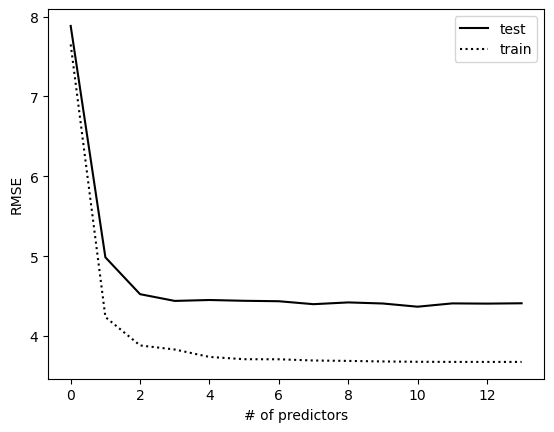

In [22]:
# Step 1: Plot the RMSE for the test set
# 'testpred' contains the RMSE values for different numbers of predictors
# We plot these values using a solid black line ("k-"), where 'k' stands for black color and '-' indicates a solid line
plt.plot(testpred, "k-", label="test")

# Step 2: Plot the RMSE for the training set
# 'trainpred' contains the RMSE values for the training set
# We plot these values using a dashed black line ("k:")
plt.plot(trainpred, "k:", label="train")
plt.xlabel("# of predictors"); plt.ylabel("RMSE"); plt.legend();

- The RMSEs for models with two or more predictors are similar. While 12 predictors might perform slightly better, the two-predictor model is simpler and more practical. Additionally, the random nature of the train-test split could yield different results, favoring the simplest justifiable model.
- The training sample’s RMSE values are always much lower than the test sample’s, showing the overconfidence that comes from using the same data for both training and evaluation.
- Sample splitting practices vary based on individual needs and motivations. In low-trust environments, some analysts might fit and select models using the same data, hiding their process and only reporting the final model’s performance. This can lead to acceptance of academic papers or sales of models to clients before fresh data reveals the truth. Such behavior can stem from ignorance or malpractice.
- To prevent malpractice, a trusted guardian splits the data and gives only the training sample to analysts. Analysts develop models using this sample, and the guardian tests these models on the test sample, reporting the results. This method, used in prediction competitions like M4, ensures unbiased performance estimates.
- From this perspective, we’ve already cheated a bit by submitting not one model but fourteen for evaluation. While this helps in choosing the best model, the observed RMSE will be biased downwards since we picked the smallest one. With a small set of models, the bias is minor, but it worsens with more candidates.
- Sample splitting is valuable for honest model evaluation, though it might lead to a poorer model choice with variable estimates. If using the model for personal purposes, overfitting would only harm us. In such cases, and for the truly honest, avoiding sample splitting might be preferable.
- For our fat density example, we need to propose a model for predicting future responses. After choosing our model, we can estimate its parameters using either the training sample or the full data. To convince others of the model’s potential performance, we should use the training data. However, for the best predictions and accurate uncertainty estimates, it’s usually best to use the full data.
- Sample splitters should know why they’re using the method and consider the trust level expected from others in evaluating the outcome. They must remember that sample splitting only guards against overconfidence, not other prediction pitfalls.

# 6. Crossvalidation
- Sample splitting uses a single random split, which isn’t efficient for model selection since only part of the data is used for estimation and validation. Cross-validation aims to use data more efficiently and reduce variation from random splitting.
- To cross-validate, we randomly divide the data into k equal parts. We fit the model using k-1 parts and evaluate it with the remaining part. This process is repeated k times, each time leaving out a different part. We then average the performance measures to get an overall model performance.
- Apply to this data, first we scale the full sample and extract the design matrix. Then, we fit a regression model with all predictors to start the process.

In [23]:
# Step 1: Standardize the 'fat' dataset
# 'scale(fat)' standardizes the dataset, meaning it transforms the values so that each feature (column) has a mean of 0 and a standard deviation of 1.
# This is important when features have different units or scales, as it ensures that each feature contributes equally to the model.
scalfat = pd.DataFrame(scale(fat), columns=fat.columns)

# Step 2: Select the predictor variables (features) from the standardized dataset
# We select these columns from the standardized 'scalfat' dataset and store them in 'X'.
X = scalfat.loc[:, prednames]

# Step 3: Initialize the linear regression model
# 'linear_model.LinearRegression(fit_intercept=False)' initializes a linear regression model.
# Setting 'fit_intercept=False' means that the model will not include an intercept term, which assumes the data has already been centered (standardized).
reg = linear_model.LinearRegression(fit_intercept=False)

# Step 4: Fit the model to the data
reg.fit(X, scalfat.brozek)

LinearRegression(fit_intercept=False)

- We load the cross-validated RFE method using the RFECV function from scikit-learn, setting ( k = 10 ). We use the negative mean squared error as our performance measure since RFECV requires a criterion where higher values are better. The MSE and RMSE will yield the same choices. RFECV follows the same sequence of candidate models as RFE, eliminating the predictor with the smallest parameter estimate at each stage, which is why we scale the data.

In [24]:
from sklearn.feature_selection import RFECV
# Step 1: Initialize the RFECV object
# 'reg' is a linear regression model that will be used as the estimator.
# 'step=1' means that features will be eliminated one at a time during the recursive feature elimination process.
# 'cv=10' specifies 10-fold cross-validation, meaning the data will be split into 10 parts.
# 'scoring="neg_mean_squared_error"' means that the negative mean squared error (MSE) will be used as the evaluation metric.
# The goal is to minimize the mean squared error (MSE) while selecting the best subset of features.
selector = RFECV(reg, step=1, cv=10, scoring='neg_mean_squared_error')

# Step 2: Fit the RFECV model to the data
# 'X' contains the predictor variables (features), which were previously standardized.
# 'scalfat.brozek' is the response variable, representing the body fat percentage (brozek).
# The RFECV model will recursively eliminate features and use cross-validation to select the best number of features.
selector = selector.fit(X, scalfat.brozek)

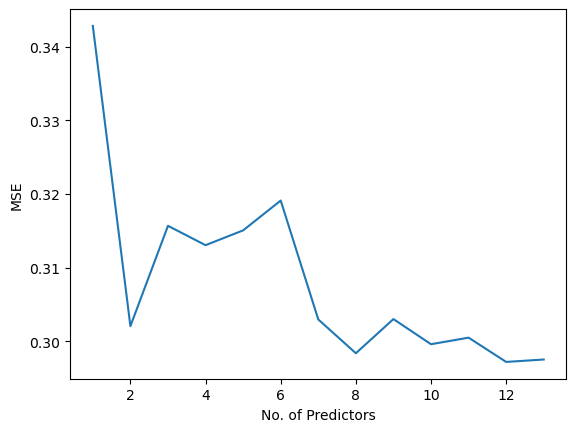

In [25]:
# Step 1: Plot the MSE vs. Number of Predictors
# 'np.arange(1, 14)' creates an array of integers starting from 1 to 13 (since 14 is not inclusive).
# This represents the number of predictors used at each stage of the RFECV process.
# '-selector.grid_scores_' contains the cross-validated mean squared error (MSE) values for each subset of predictors.
# We negate the values because RFECV was set up with 'neg_mean_squared_error' as the scoring metric, and we want to plot the actual positive MSE values.
plt.plot(np.arange(1, 14), -selector.cv_results_['mean_test_score'])
plt.xlabel("No. of Predictors"); plt.ylabel("MSE");

- The 12-predictor model has the smallest MSE, but we might prefer the simpler two-predictor model for its nearly comparable performance. The chosen model is:

In [26]:
# 'selector.ranking_' returns an array of feature rankings after performing Recursive Feature Elimination with Cross-Validation (RFECV).
# Each element in the array corresponds to the ranking of a particular feature in the dataset.
# A ranking of '1' means that the feature is selected as part of the optimal model, while higher values indicate less important features that were eliminated.

selector.ranking_

# Explanation of the Output:
# The output array represents the ranking of each predictor (feature) after performing RFECV.

# Explanation of Rankings:
# - Features ranked as '1' are considered the most important and have been selected as part of the final model.
# - A feature ranked as '2' (or any number greater than 1) was deemed less important, and it was eliminated by RFECV.

# Interpretation of the Result:
# In this case, 12 out of the 13 features have been assigned a ranking of '1', meaning they are considered important for predicting the target variable ('brozek').
# Only 1 feature has a ranking of '2', which means RFECV considered it less useful for the model compared to the other features.

# How the rankings work:
# 1. RFECV starts by fitting the model with all features and then recursively removes the least important features based on cross-validation performance.
# 2. After each iteration, it assesses the model’s performance using the remaining features.
# 3. The final ranking array shows the importance of each feature: those with a ranking of '1' were not eliminated, while those with higher rankings were eliminated during the process.

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1])

- Chosen predictors are marked as ‘1’, with others ranked by preference. Here, only knee circumference is discarded.
- The scores’ lack of convexity with predictors is disappointing, but given the random cross-validated split, convexity isn’t guaranteed.
- We chose ( k = 10 ) as a good balance between computational cost and variation. While leave-one-out cross-validation ( k = n ) avoids randomness, it’s computationally expensive and not always effective. Empirical evidence supports ( k = 10 ) as a better choice.
- Harrell (2015) offers extensive advice on model validation using sample splitting and cross-validation, recommending bootstrap methods. Steyerberg (2009) provides guidance on model selection and validation in clinical applications.

# 7. Principal Components Analysis
- In designed experiments, predictors are usually orthogonal, simplifying model fitting and interpretation. However, in observational data, predictors are often correlated. Transforming these predictors to orthogonality could ease interpretation.
- PCA is a rotation of the data around its mean. We center the predictor matrix (X) by subtracting the mean of each variable, ensuring the columns of (X) have a mean of zero. This (X) excludes an intercept term.
- The PC decomposition can be computed intuitively as follows:
    - Identify the direction of greatest variation by finding a vector $u_1$ that maximizes $var(Xu_1)$ subject to $u_1^T u_1 = 1$. This $u_1$ represents the axis of greatest variation, and $z_1 = X u_1$ is the first principal component (PC).
    - The data is now rotated so that the first principal component aligns with the direction of greatest variation. Next, we find a direction orthogonal to this axis that captures the greatest remaining variation. This involves finding $u_2$ such that $var(X u_2)$ is maximized, subject to $u_1^T u_2 = 0$ and $u_2^T u_2 = 1$. The resulting $z_2 = Xu_2$ is the second principal component.
    - We continue identifying directions of greatest variation that are orthogonal to the previously found directions. In low-dimensional spaces, this process continues until all dimensions are covered. In high-dimensional spaces, we stop when the remaining variation is minimal.
- We express $z_i$ as $Xu_i$, where $z_i$ are the principal components (PCs). Collecting these terms, we form the matrix $Z = XU$, with $Z$ and $U$ containing the columns $z_i$ and $u_i$, respectively. $U$ is known as the rotation matrix. Essentially, $Z$ represents the data rotated to achieve orthogonality.
- In practice, using singular value decomposition (SVD) is a more efficient way to compute PCA. SVD is also commonly used to compute least squares estimates.

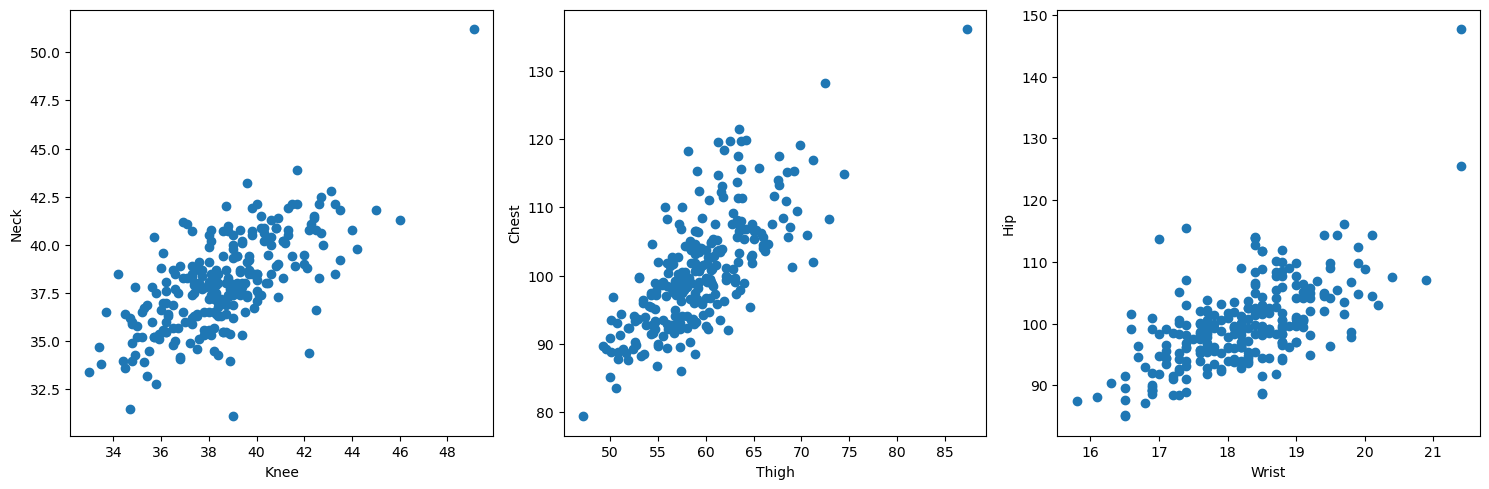

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(fat.knee, fat.neck)
axes[0].set_xlabel("Knee"); axes[0].set_ylabel("Neck")
axes[1].scatter(fat.thigh, fat.chest)
axes[1].set_xlabel("Thigh"); axes[1].set_ylabel("Chest")
axes[2].scatter(fat.wrist, fat.hip)
axes[2].set_xlabel("Wrist"); axes[2].set_ylabel("Hip")
plt.tight_layout();

- Body circumferences are strongly correlated, suggesting less information than the number of predictors implies. PCA helps uncover this lower-dimensional variability in high-dimensional data.
- We focus on the circumference measurements in the fat dataset and compute the principal components:

In [28]:
from sklearn.decomposition import PCA
# Step 1: Create a new PCA object
# We initialize a PCA object. This object will be used to fit and transform the data.
pca = PCA()

# Step 2: Select columns 8 onwards from the 'fat' dataset
# 'cfat' contains the subset of the 'fat' dataset starting from the 8th column.
cfat = fat.iloc[:, 8:]

# Step 3: Fit the PCA model on 'cfat'
# The 'fit' method performs PCA on the selected data.
# It identifies the directions (principal components) in which the data varies the most.
# This step computes the principal components but does not transform the data yet.
pca.fit(cfat)

PCA()

In [29]:
# Standard deviations of the principal components
np.sqrt(pca.explained_variance_).round(2)

array([21.95, 10.63,  3.63,  2.51,  1.97,  1.59,  1.46,  1.3 ,  1.19,
        1.1 ,  0.52])

In [30]:
# Evaluate the proportion of total variation each principal component explains
pca.explained_variance_ratio_.round(3)

array([0.768, 0.18 , 0.021, 0.01 , 0.006, 0.004, 0.003, 0.003, 0.002,
       0.002, 0.   ])

- The first PC explains most of the total variation, while the second PC explains much less, and later PCs explain almost nothing. This is expected since these measurements describe human shape, which varies in size but not much in shape. Adding animals or aliens would likely increase variation in the other PCs.
- Instead of ten variables, we could use a single variable from the first PC’s linear combination to effectively represent the ten-dimensional data.
- The first column of the rotation matrix, $u_1$, is a linear combination describing the first principal component, which we neatly print on one row as rot[0, :].

In [31]:
rot = pca.components_
pd.DataFrame(rot[0,:], index=cfat.columns).round(3).T

,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,0.777,0.089,0.313,0.375,0.288,0.198,0.091,0.048,0.106,0.058,0.032


- Chest, abdomen, hip, and thigh measurements dominate the first principal component, likely because they are larger and more variable than wrist or ankle circumferences. To address this, we can scale the variables to standard units by subtracting the mean and dividing by the standard deviation.

In [32]:
from sklearn.preprocessing import scale
# Step 1: Scale the data
# 'scale(cfat)' standardizes the 'cfat' data by removing the mean and scaling to unit variance.
scalfat = pd.DataFrame(scale(cfat))

# Step 2: Create a PCA object
pcac = PCA()

# Step 3: Fit the PCA model on the scaled data
pcac.fit(scalfat)

# Step 4: Display explained variance ratio
# 'explained_variance_ratio_' shows the proportion of variance explained by each principal component.
pcac.explained_variance_ratio_.round(2)

array([0.69, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.  ])

- After scaling, the first component explains 70.2% of the variability. The remaining variation is more evenly distributed among the other components. Here is the first principal component:

In [33]:
rot = pcac.components_
pd.DataFrame(rot[0,:], index=cfat.columns).round(3).T

,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,0.288,0.314,0.321,0.313,0.333,0.319,0.317,0.24,0.309,0.259,0.289


- It has similar coefficients for all variables, representing “overall size” as it approximates the mean of these standardized variables. This dominant first principal component suggests that men’s body shapes are mostly proportional, with larger men being scaled-up versions of smaller men.
- The other principal components capture variations orthogonal to the first PC. For instance, consider the second principal component:

In [34]:
pd.DataFrame(rot[1,:], index=cfat.columns).round(3).T

,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,0.399,-0.052,-0.329,-0.461,-0.22,-0.155,0.037,0.561,-0.033,0.207,0.292


- The second principal component contrasts central body measures (chest, abdomen, hip, thigh) with extremities (forearm, wrist, ankle). It indicates where the body carries its weight, explaining 7.3% of the total variation, the largest after the first PC.
- We haven’t linked predictors to the response in a regression model yet, focusing only on predictors so far. PCA is widely used in various applications (see Joliffe, 2002).
- In the fat density example, predictors are highly correlated, mostly reflecting overall body size. This suggests potential collinearity issues, but we need to proceed to regression before deciding on predictor necessity.
- Like variances, PCA is sensitive to outliers, so it's crucial to check for them. Beyond usual graphical checks, look for outliers in higher dimensions, which can be tricky. For instance, a person weighing 50 kg and standing 2 m tall might not seem unusual individually, but together, these values are likely an error.
- The minimum covariance determinant method by Rousseeuw and Driessen (1999) is a robust way to estimate multivariate location and scatter. We select h, representing the majority of n reliable observations, and identify h observations with the smallest covariance matrix determinant. The EllipticEnvelope in scikit-learn uses this method, assuming 10% of observations are unreliable by default.

In [35]:
from sklearn.covariance import EllipticEnvelope
# Step 1: Create an instance of EllipticEnvelope
# This initializes the outlier detection model using the default parameters.
# The model assumes the data is Gaussian and tries to detect outliers that deviate from this distribution.
ee = EllipticEnvelope()

# Step 2: Fit the model to the data
# 'cfat' is the input data
# The 'fit' method estimates the location and covariance of the data assuming a Gaussian distribution.
# This helps detect potential outliers in the data.
ee.fit(cfat)

EllipticEnvelope()

- We could use the covariance of this central data subset for PCA, but identifying (and possibly discarding) outliers might be better. To find points far from the mean while considering data variation, we use Mahalanobis distance, which adjusts for data correlation. It is defined as:
$$ d_i^2 = {(x - μ)}^T Σ^{-1} (x - μ) $$
- where μ is a measure of center and Σ is a measure of covariance.
- We compute these and make a half-normal plot:

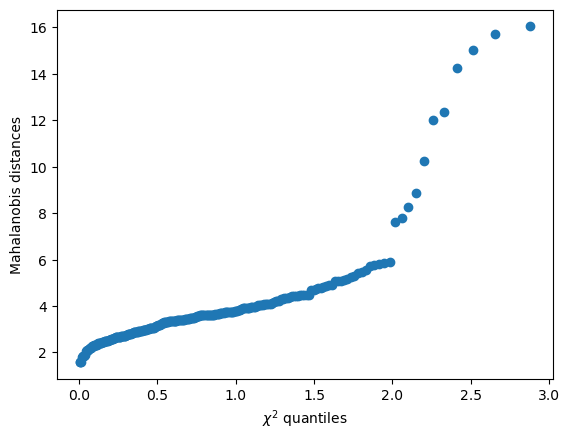

In [36]:
# Step 1: Compute the Mahalanobis distances
# 'ee.mahalanobis(cfat)' computes the Mahalanobis distance of each observation in 'cfat' from the fitted distribution.
# The Mahalanobis distance measures how far each point is from the mean of the distribution, accounting for correlations between variables.
# 'np.sqrt()' takes the square root of the Mahalanobis distances to make them comparable with chi-squared quantiles.
md = np.sqrt(ee.mahalanobis(cfat))

# Step 2: Set up for the quantile plot
# 'n' is the number of data points.
n = len(md)

# 'ix' is an array of indices from 1 to n.
ix = np.arange(1, n + 1)

# Step 3: Calculate theoretical quantiles from a normal distribution
# 'halfq' calculates the expected chi-squared quantiles.
# 'sp.stats.norm.ppf()' is the inverse of the CDF for a normal distribution.
# We calculate the theoretical quantiles for a QQ plot.
halfq = sp.stats.norm.ppf((n + ix) / (2 * n + 1))

# Step 4: Create the scatter plot of Mahalanobis distances vs theoretical quantiles
# 'np.sort(md)' sorts the Mahalanobis distances.
# We plot the sorted Mahalanobis distances against the theoretical chi-squared quantiles to see if they follow a normal distribution.
plt.scatter(halfq, np.sort(md))
plt.xlabel(r'$\chi^2$ quantiles')  # X-axis label: Theoretical chi-squared quantiles
plt.ylabel('Mahalanobis distances');  # Y-axis label: Mahalanobis distances

- We identify some outliers and can test PCA sensitivity by re-analyzing the data without them. In this example, the second PC changes more significantly.
- We can model $y$ as $y \sim X$. By replacing $X$ with $Z$ and using only the first few columns of $Z$, we perform principal components regression (PCR). PCR is used for both explanation and prediction.
- When aiming for simple, well-fitting, and understandable models, PCR can be useful. Principal components (PCs) are linear combinations of predictors. For example, in modeling body fat percentage (brozek), we previously analyzed this data in Linear Regression but now use fewer predictors. Here is the model output using all ten circumference predictors:

In [37]:
xmat = sm.add_constant(cfat)
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.sumary()

          coefs stderr tvalues pvalues
const   -63.370  4.545  -13.94  0.0000
free     -0.368  0.016  -23.58  0.0000
neck      0.187  0.119    1.57  0.1176
chest     0.185  0.048    3.82  0.0002
abdom     0.348  0.047    7.38  0.0000
hip       0.244  0.068    3.61  0.0004
thigh     0.171  0.069    2.48  0.0137
knee      0.469  0.119    3.93  0.0001
ankle     0.309  0.113    2.75  0.0064
biceps    0.222  0.088    2.53  0.0120
forearm   0.305  0.102    2.99  0.0031
wrist     0.080  0.266    0.30  0.7631

n=252 p=12 Residual SD=2.240 R-squared=0.92


- Due to collinearity, it’s hard to determine which factors influence body fat percentage. Coefficient signs and significance are inconsistent, e.g., abdomen circumference shows a positive effect while hip circumference shows a negative one.
- Now, let’s look at the output using only the first two principal components:

In [38]:
# Step 1: Apply PCA and transform the scaled data
# 'scale(cfat)' standardizes the 'cfat' data (which is a subset of the 'fat' dataset).
# 'pca.fit_transform()' fits the PCA model and transforms the standardized data into principal component scores.
# The result, 'pcscores', contains the principal component scores for each data point.
pcscores = pca.fit_transform(scale(cfat))

# Step 2: Select the first two principal components
# 'xmat' is created by taking the first two principal components (pcscores[:, :2]) and adding a constant (intercept term) to the design matrix.
# 'sm.add_constant()' ensures that the model includes an intercept.
xmat = sm.add_constant(pcscores[:,:2])
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.sumary()

       coefs stderr tvalues pvalues
const 18.938  0.281   67.41  0.0000
x1     1.624  0.102   15.96  0.0000
x2    -4.990  0.313  -15.95  0.0000

n=252 p=3 Residual SD=4.460 R-squared=0.67


- Reducing from ten to two predictors loses some explanatory power, but these two predictors are orthogonal, eliminating collinearity issues.
- The first PC measures overall size, associated with higher body fat. The second PC shows a negative association, indicating leaner men with more substance in their extremities, likely more muscular. Thus, PCR provides a clearer explanation compared to the full predictor regression.
- One objection is that using two PCs still involves all ten predictors, offering no variable reduction. Additionally, interpreting PCs is subjective. To address this, we can select key predictors with the largest coefficients in the PCs.
- For example, abdomen circumference for the first PC and the difference between abdomen and ankle circumference for the second PC. These have the largest coefficients (-0.40 and 0.62) for the second PC.
- Although hip has the largest coefficient for the first PC, abdomen is a close choice. Thus, we only need two predictors, scaled to standard units.

In [39]:
# Step 1: Create a new design matrix (xmat) with transformed features
# 'scalfat' is a standardized (scaled) version of the 'fat' dataset.
# We extract two columns:
# - 'scalfat.iloc[:,2]' refers to the 3rd column, which we'll call 'overall' (likely some overall body measurement).
# - 'scalfat.iloc[:,6] - scalfat.iloc[:,2]' is a difference between the 7th and 3rd columns, which we interpret as 'muscle mass'.
xmat = pd.concat([scalfat.iloc[:,2], 
                  scalfat.iloc[:,6] - scalfat.iloc[:,2]], axis=1)

# Step 2: Rename the columns of 'xmat' for clarity
xmat.columns = ['overall','muscle']

# Step 3: Add a constant (intercept) to the design matrix
# 'sm.add_constant()' ensures that the model includes an intercept term in the regression.
xmat = sm.add_constant(xmat)
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.sumary()

         coefs stderr tvalues pvalues
const   18.938  0.349   54.31  0.0000
overall  5.446  0.376   14.48  0.0000
muscle   0.033  0.502    0.07  0.9475

n=252 p=3 Residual SD=5.535 R-squared=0.49


- Our simplified model fits nearly as well as the ten-predictor model. We’ve named the two predictors, making it easier to interpret and explain. Future studies could be more cost-effective, needing only these two measures.
- For PCR to work well for explanation, predictors usually need to measure quantities with interpretable linear combinations, typically having the same units. Using variables like age and weight would complicate interpretation. Even with homogeneous predictors, getting interpretable PCs requires some luck and imagination. These factors limit PCR’s utility for explanation. It’s worth trying, but results may vary.

# 8. Lasso
- The lasso method is similar to ridge regression, but it minimizes an equation with a different penalty term to select the optimal value for $\hat{β}$:
$$ \left({y}-{X\beta}\right)^\prime\left({y}-{X\beta}\right) \text{~subject to~} \sum_{j}^{p}\left|\beta_j\right|\le t $$
      or equivalent to minimize:
$$ \left({y}-{X\beta}\right)^\prime\left({y}-{X\beta}\right) + \alpha \sum_j \left|\beta_j\right| $$
- Introduced by Tibshirani in 1996, the lasso method lacks an explicit solution but can be efficiently solved using least angle regression, as described by Efron et al. in 2004. “Lasso” stands for “Least Angle Shrinkage and Selection Operator.”
- The key difference between lasso and ridge regression lies in their solutions. The lasso constraint $L_1$ $\sum_{j}^{p}|\beta_j| \le t$ forms a square in two dimensions and a polytope in higher dimensions, often resulting in some coefficients being zero. As $t$ increases, more variables are included, and their coefficients grow. For large $t$, the constraint becomes redundant, yielding the least squares solution.
- For moderate $t$ values, many $\hat{\beta}$ in lasso tend to be zero, making it ideal for sparse effects where only a few predictors matter. Lasso acts as a variable selection method by eliminating predictors with $\hat{\beta} = 0$. In contrast, ridge regression reduces $\hat{\beta}$ but doesn’t eliminate variables.

In [40]:
X = faraway.datasets.fat.load().iloc[:,8:]
n_alphas = 50
alphas = np.logspace(-2, 2, n_alphas)

In [41]:
# Create a Lasso regression model
lasso = linear_model.Lasso()

# Initialize an empty list to store the coefficients
coefs = []

# Loop through each value in the list of alpha values (regularization strengths)
for a in alphas:
    # Set the alpha parameter of the Lasso model to the current value
    lasso.set_params(alpha=a)
    
    # Fit the Lasso model to the data (X) and the target variable (fat.brozek)
    lasso.fit(X, fat.brozek)
    
    # Append the coefficients of the fitted model to the list
    coefs.append(lasso.coef_)

In [42]:
# Using crossvalidation to select the best value of α
# Create a LassoCV model with 10-fold cross-validation
lassocv = linear_model.LassoCV(cv=10)

# Fit the LassoCV model to the data (X) and the target variable (fat.brozek)
lassocv.fit(X, fat.brozek)

# Retrieve the best alpha (regularization strength) found during cross-validation
lassocv.alpha_

0.09601704069334495

- The LassoCV selects a grid of a values.
- It is wise to check the range of these values:

In [43]:
min(lassocv.alphas_),max(lassocv.alphas_)

(0.06773812405517762, 67.73812405517762)

- The optimized value of 0.096 lies within the range, suggesting we’ve likely found a global optimum. If it were on the edge, we’d need to adjust the grid to continue the search.
- We plot the coefficients for each value of α

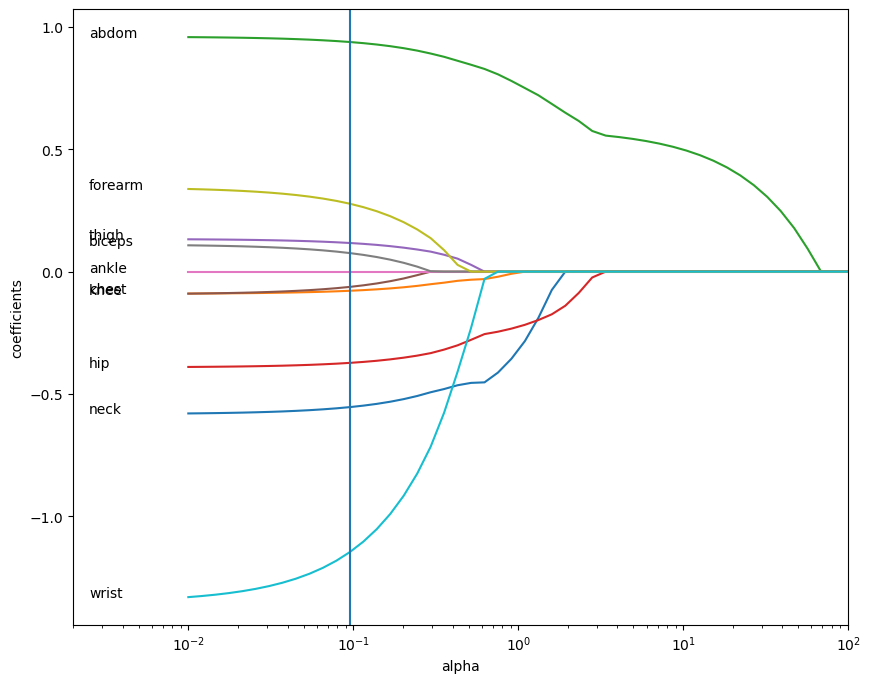

In [44]:
plt.figure(figsize=(10, 8))
# Get the current Axes instance on the current figure
ax = plt.gca()

# Plot the alpha values on the x-axis and the corresponding coefficients on the y-axis
ax.plot(alphas, coefs)

# Set the limits for the x-axis
plt.xlim(min(alphas)/5, max(alphas))

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Loop through each feature in the dataset
for i in range(len(X.columns)):
    # Add text labels to the plot at the specified position
    plt.text(min(alphas)/4, coefs[0][i], X.columns[i])
plt.xlabel('alpha'); plt.ylabel('coefficients'); plt.axvline(lassocv.alpha_);

- As α increases, the estimated coefficients for each predictor decrease, shown in the plot. The cross-validated choice of α is marked by a vertical line. For larger α, only abdomen circumference is included. As α decreases, more predictors like hip and neck are added. At the smallest α values, all predictors are included, and coefficients approach their least squares values. Thus, α serves as a variable selection method.
- In this example, cross-validation selects a small α value, including most predictors in the model.

In [45]:
lassocv.coef_.round(3)

array([-0.553, -0.078,  0.938, -0.373,  0.117, -0.062, -0.   ,  0.076,
        0.277, -1.144])

- Only the estimate for ankle circumference is set to zero. In contrast, we can examine the least squares estimates:

In [46]:
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X, fat.brozek)
reg.coef_.round(3)

array([-0.582, -0.091,  0.96 , -0.391,  0.134, -0.094,  0.004,  0.111,
        0.345, -1.353])

- Lasso is more effective for problems with many variables, like the spectroscopy example in this chapter. However, strong collinearity in predictors here causes convergence issues. Cross-validation suggests a very small $\alpha$. We also use many iterations and a relaxed convergence criterion to aid computation.